1. Pré-processamento da Imagem

    Conversão para Escala de Cinza: Converter a imagem para escala de cinza, facilitando a aplicação de outros filtros.
    Remoção de Ruído: Aplicar filtros como o filtro Gaussiano para reduzir ruídos, preservando as bordas da imagem.
    Equalização de Histograma: Equalizar o histograma para aumentar o contraste e melhorar a visibilidade dos caracteres.

2. Detecção da Placa

    Detecção de Bordas: Utilizar o algoritmo de Canny para detectar as bordas. As bordas da placa geralmente formam um retângulo.
    Detecção de Contornos: Usar algoritmos de contorno (como findContours) para detectar contornos retangulares. A área e a proporção do retângulo podem ser utilizadas para identificar o contorno que corresponde à placa.
    Correção de Perspectiva: Se a placa estiver inclinada, aplicar uma transformação de perspectiva (usando uma transformação de homografia, por exemplo) para endireitá-la.

3. Segmentação dos Caracteres

    Binarização: Aplicar uma limiarização adaptativa para converter a placa em uma imagem binária (preto e branco). Isso facilita a separação dos caracteres do fundo da placa.
    Isolamento de Caracteres: Utilizar técnicas de segmentação de objetos conectados (como o método de rotulagem de componentes conectados) para isolar cada caractere da placa.
    Filtragem de Ruídos: Descartar objetos conectados pequenos que não correspondem ao tamanho típico dos caracteres.

4. Extração dos Caracteres

    Normalização dos Caracteres: Redimensionar e alinhar os caracteres segmentados para um tamanho padrão.
    Detecção de Bordas dos Caracteres: Realizar uma segunda detecção de bordas com Canny para obter os contornos específicos de cada caractere.
    Extração de Características: Para cada caractere, extrair características, como contornos e perfil de borda, que podem ser usadas para comparar os caracteres com um conjunto de modelos de letras e números previamente definidos.

5. Reconhecimento Manual

    Neste caso, a etapa de reconhecimento pode ser realizada comparando cada caractere extraído com um banco de padrões previamente definidos de caracteres alfanuméricos, utilizando uma técnica de comparação direta, como correlação ou diferença de pixels.

In [11]:
# code here
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [12]:
#remove caracteres nao alfabetics e nao numericos da string

import re

def remover_nao_alfanumericos(texto):
    # Expressão regular para substituir qualquer caractere que não seja alfanumérico por uma string vazia
    return re.sub(r'[^A-Z0-9]', '', texto)

print(remover_nao_alfanumericos("asdasd...da3332sr"))

3332


## Pré-processamento

Converte a imagem para a escala de cinza

aplicar filtro de mediana

Aplicar filtro gaussiano para remoção de ruídos

Equaliza o histograma para aumentar o contraste e melhorar a visibilidade dos caracteres.

Detecta as bordas

Extrai caracteres selecionados

Testando a dilatação

testando a erosão para tirar os escritos brancos

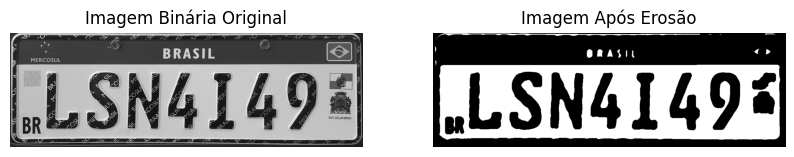

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pytesseract


# Carregar a imagem em escala de cinza
imagem = cv2.imread("placa4.jpg", cv2.IMREAD_GRAYSCALE)
# suavização de mediana
imagem_com_blur = cv2.medianBlur(imagem, 13)
# Aplicar a binarização para criar uma imagem binária (preto e branco)
# Inverte para que o fundo seja branco (255) e o texto seja preto (0)
_, imagem_binaria = cv2.threshold(imagem_com_blur, 128, 255, cv2.THRESH_BINARY_INV)

# Inverter as cores
imagem_binaria = cv2.bitwise_not(imagem_binaria)

# Definir o kernel para a erosão (ajuste o tamanho conforme necessário)
kernel = np.ones((5, 5), np.uint8)  # Tamanho de 3x3 é um bom ponto de partida

# Aplicar a erosão
imagem_erosionada = cv2.erode(imagem_binaria, kernel, iterations=1)

# # Aplicar a dilatação
# imagem_dilatada = cv2.dilate(imagem_binaria, kernel, iterations=1)

# Exibir a imagem antes e depois da erosão
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Imagem Binária Original")
plt.imshow(imagem, cmap="gray")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Imagem Após Erosão")
plt.imshow(imagem_erosionada, cmap="gray")
plt.axis("off")

plt.show()


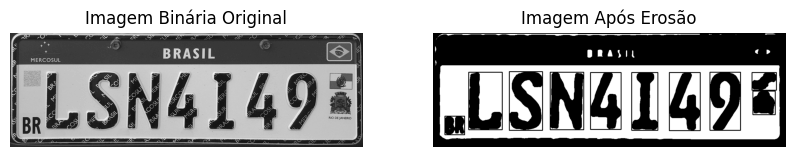

LSN4149


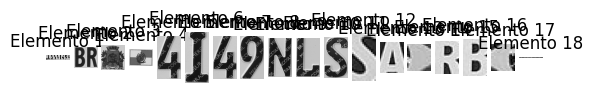

In [14]:
# imagem = imagem_binaria
# imagem_suavizada = cv2.GaussianBlur(imagem, (5, 5), 0)
# imagem_suavizada = cv2.bitwise_not(imagem_suavizada)
# # Detectar as bordas com o algoritmo de Canny
# bordas = cv2.Canny(imagem_suavizada, 100, 200)

# # Aplicar a dilatação para aumentar a área das bordas
# kernel = np.ones((5, 5), np.uint8)  # Define o kernel de dilatação
# bordas_dilatadas = cv2.dilate(bordas, kernel, iterations=1)


# Encontrar os contornos na imagem dilatada
contornos, _ = cv2.findContours(imagem_erosionada, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Lista para armazenar os elementos extraídos
elementos_extraidos = []

# Filtrar e extrair os elementos detectados
for contorno in contornos:
    # Calcular o retângulo delimitador para cada contorno
    x, y, w, h = cv2.boundingRect(contorno)

    # Filtrar contornos com base no tamanho (ajuste conforme necessário)
    if w > 10 and h > 10:  # Limite mínimo para considerar como caractere
        # Extrair a região do elemento da imagem original
        elemento = imagem[y:y+h, x:x+w]
        elementos_extraidos.append(elemento)

        # Desenhar um retângulo ao redor da região do elemento
        cv2.rectangle(imagem_erosionada, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Exibir a imagem antes e depois da erosão
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Imagem Binária Original")
plt.imshow(imagem, cmap="gray")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Imagem Após Erosão")
plt.imshow(imagem_erosionada, cmap="gray")
plt.axis("off")

# Exibir a imagem com os elementos destacados
plt.imshow(cv2.cvtColor(imagem_erosionada, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

texto_importane = ""
# Identificar os caracteres extraídos usando o Tesseract OCR
for idx, elemento in enumerate(elementos_extraidos):
    # Aplicar thresholding para melhorar o contraste (opcional)
    _, elemento_bin = cv2.threshold(elemento, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    # Utilizar o Tesseract para identificar o caractere
    texto_detectado = pytesseract.image_to_string(elemento_bin, config='--psm 10')  # psm=10 para uma única linha de texto
    if(len(texto_detectado)>4):
        texto_importane=(texto_detectado)
        break
    # print(f"Caractere {idx + 1}: {texto_detectado.strip()}")

texto = remover_nao_alfanumericos(texto_importane)
print(texto)
# Exibir os elementos extraídos (opcional)
for idx, elemento in enumerate(elementos_extraidos):
    plt.subplot(1, len(elementos_extraidos), idx + 1)
    plt.imshow(elemento, cmap='gray')
    plt.axis('off')
    plt.title(f"Elemento {idx + 1}")
plt.show()
